In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import subprocess

In [2]:
os.remove("stats.txt")
P_s = {0, 1, 2, 4, 8, 16} # 0 - без параллельного кода
N_s = {10, 100, 1000, 10000, 100000}
for P in P_s:
    for N in N_s:
        os.system("./parallel -100 100 0 %d 0.5 %d"%(N, P))

In [3]:
data = pd.read_csv("stats.txt", delimiter=' ', header=None)
data[2] = data[2].apply(lambda s: float(s[:-1]))
data.columns = ['p', 'life', 'T', 'a', 'b', 'x', 'N', 'p', 'P']
data = data.sort_values(['P', 'N'])

In [4]:
data

,p,life,T,a,b,x,N,p,P
3,0.50000,11398.00000,0.002447,-100,100,0,10,0.5,0
1,0.54000,8847.98000,0.019398,-100,100,0,100,0.5,0
2,0.47300,9615.10200,0.221734,-100,100,0,1000,0.5,0
4,0.50020,10072.12280,2.610770,-100,100,0,10000,0.5,0
0,0.50066,10057.88652,23.205513,-100,100,0,100000,0.5,0
8,0.40000,7367.80000,0.001751,-100,100,0,10,0.5,1
6,0.51000,10092.42000,0.025144,-100,100,0,100,0.5,1
7,0.52300,9913.71000,0.219978,-100,100,0,1000,0.5,1
9,0.49890,9978.83760,2.162913,-100,100,0,10000,0.5,1
5,0.50009,10058.17876,22.367659,-100,100,0,100000,0.5,1


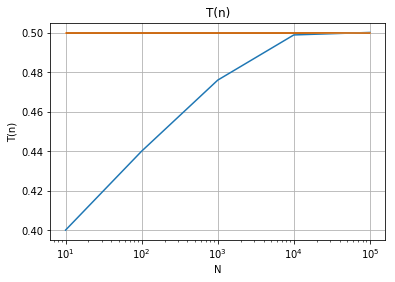

In [5]:
P = 4
dat = data[data['P']==P].sort_values('N')

# Оценим по графику, с какого N у нас получается хорошее приближение, чтобы взять это N в следующем задании.
plt.figure()
y = np.array(dat['p'])
x = np.array(dat['N'])
plt.hlines(0.5, 10, np.max(x))
plt.semilogx(x, y)
plt.title('T(n)')
plt.xlabel('N')
plt.ylabel('T(n)')
plt.grid()
plt.show()

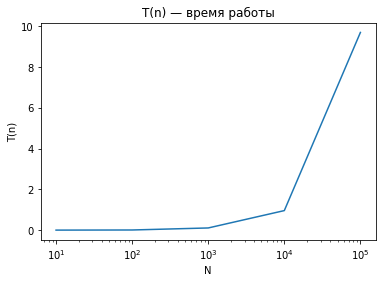

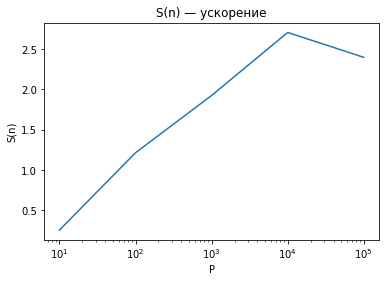

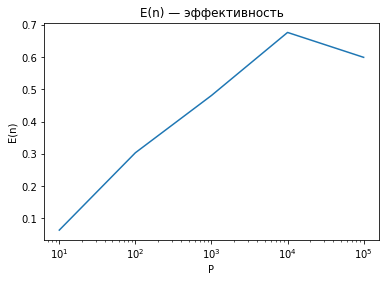

In [6]:
P = 4
dat = data[data['P']==P].sort_values('N')

plt.figure()
y = np.array(dat['T'])
x = np.array(dat['N'])
plt.semilogx(x, y)
plt.title('T(n) — время работы')
plt.xlabel('N')
plt.ylabel('T(n)')
plt.show()

T_0 = np.array(data[data['P']==0].sort_values('N')['T'])
plt.figure()
y = np.array(T_0/dat['T'])
x = np.array(dat['N'])
plt.semilogx(x, y)
plt.title('S(n) — ускорение')
plt.xlabel('P')
plt.ylabel('S(n)')
plt.show()

plt.figure()
y = np.array(T_0/dat['T']/P)
x = np.array(dat['N'])
plt.semilogx(x, y)
plt.title('E(n) — эффективность')
plt.xlabel('P')
plt.ylabel('E(n)')
plt.show()

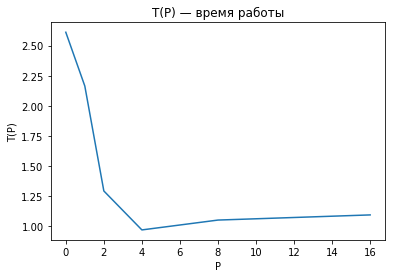

/home/sharik/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  del sys.path[0]


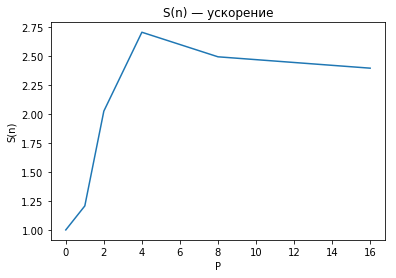

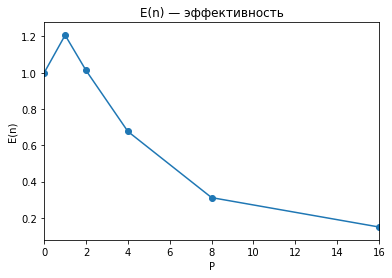

In [7]:
N = 10000
dat = data[data['N']==N].sort_values('P')
y = np.array(dat['T'])

plt.figure()
x = np.array(dat['P'])
plt.plot(x, y)
plt.title('T(P) — время работы')
plt.xlabel('P')
plt.ylabel('T(P)')
plt.show()

T_0 = np.array(data[data['P']==0].sort_values('N')[data['N']==N]['T'])
plt.figure()
y = np.array(T_0/dat['T'])
x = np.array(dat['P'])
plt.plot(x, y)
plt.title('S(n) — ускорение')
plt.xlabel('P')
plt.ylabel('S(n)')
plt.show()

plt.figure()
x = np.array(dat['P'])
P_to_divide = np.array(dat['P'])
P_to_divide[0] = 1
y = np.array(T_0/np.array(dat['T'])/P_to_divide)
plt.plot(x, y)
plt.scatter(x, y)
plt.title('E(n) — эффективность')
plt.xlabel('P')
plt.ylabel('E(n)')
plt.xlim(np.min(dat['P']), np.max(dat['P']))
plt.show()